<a href="https://colab.research.google.com/github/ZJIou/11111/blob/main/easy_ocr_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

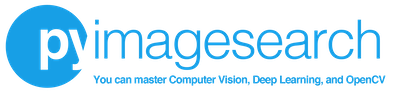

# Getting started with EasyOCR for Optical Character Recognition
### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Getting started with EasyOCR for Optical Character Recognition](https://www.pyimagesearch.com/2020/09/14/getting-started-with-easyocr-for-optical-character-recognition/) blog post published on 2020-09-14.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook.

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible by joining PyImageSearch Plus at http://pyimg.co/plus/ today.*

### Install the necessary packages

In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 10.5 MB/s eta 0:00:00


### Download the code zip file

In [2]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/easy-ocr-tutorial/easy-ocr-tutorial.zip
!unzip -qq easy-ocr-tutorial.zip
%cd easy-ocr-tutorial

--2024-11-28 15:11:24--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/easy-ocr-tutorial/easy-ocr-tutorial.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 3.5.81.103, 3.5.76.198, 52.92.136.234, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|3.5.81.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379130 (370K) [binary/octet-stream]
Saving to: ‘easy-ocr-tutorial.zip’

easy-ocr-tutorial.z 100%[===================>] 370.24K  1.25MB/s    in 0.3s    

2024-11-28 15:11:25 (1.25 MB/s) - ‘easy-ocr-tutorial.zip’ saved [379130/379130]

/content/easy-ocr-tutorial


## Blog Post Code

### Import Packages

In [3]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Using EasyOCR for Optical Character Recognition

In [5]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [6]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image to be OCR'd")
#ap.add_argument("-l", "--langs", type=str, default="en",
#	help="comma separated list of languages to OCR")
#ap.add_argument("-g", "--gpu", type=int, default=-1,
#	help="whether or not GPU should be used")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "images/111.jpg",
	"langs": "en,ru",
	"gpu": -1
}

In [7]:
# break the input languages into a comma separated list
langs = args["langs"].split(",")
print("[INFO] OCR'ing with the following languages: {}".format(langs))

# load the input image from disk
image = cv2.imread(args["image"])

# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
reader = Reader(langs, gpu=args["gpu"] > 0)
results = reader.readtext(image)

[INFO] OCR'ing with the following languages: ['en', 'ru']
[INFO] OCR'ing input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

[INFO] 0.6758: RUS
[INFO] 0.7783: ВОДИТЕЛЬСКОЕ УДОСТОВЕРЕНИЕ
[INFO] 0.9998: ИВАНОВ
[INFO] 1.0000: IVANOV
[INFO] 0.8552: 2.
[INFO] 0.9838: ВИТАЛИЙ АНАТОЛЬЕВИЧ
[INFO] 0.9930: VITALIY ANATOLYEVICH
[INFO] 1.0000: 3
[INFO] 0.8095: 20.04.1978
[INFO] 0.9268: МОСКВА
[INFO] 0.9998: MOSKVA
[INFO] 0.9507: 4а)
[INFO] 0.6338: 47.01.2014
[INFO] 1.0000: 4b)
[INFO] 0.7202: 47.01.2014
[INFO] 0.8511: ГИБДД 7725
[INFO] 0.9875: GIBDD 7725
[INFO] 0.8048: 5.
[INFO] 1.0000: 7708288277
[INFO] 1.0000: 8
[INFO] 0.9035: МОСКВА
[INFO] 0.3281: G
[INFO] 0.8198: MOSKVA
[INFO] 0.9237: 9
[INFO] 0.9960: 4с)


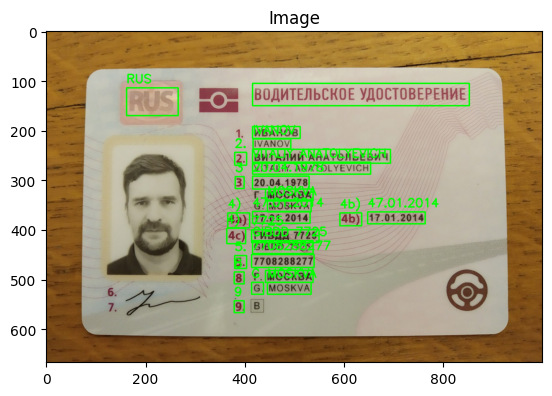

In [8]:
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# show the output image
plt_imshow("Image", image)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Getting started with EasyOCR for Optical Character Recognition*](https://www.pyimagesearch.com/2020/09/14/getting-started-with-easyocr-for-optical-character-recognition/) published on 2020-09-14.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```